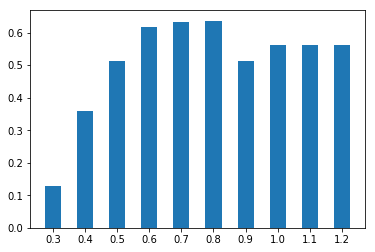

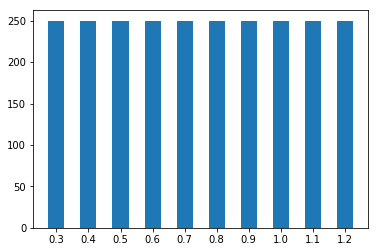

5
best epsilin:0.8
[ 0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4
  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4
 -1  1  2  3  4  0  1  2  3  4  0  0  2  3  4  0  1  2  3  4  0  1  2  3  4
  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4
  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4
  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  0  0  1  2  3  4
  0  1  2  3  4  0  1  2  3  4  0  1 -1  3 -1  0  1 -1  3  4  0  1  2  3  4
  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4
  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4
  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4]


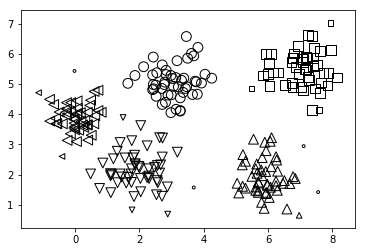

In [38]:
#使用DBSCAN算法自动估算集群数量
#使用k-means算法时，必须要有集群数量作为参数，即便可以通过轮廓系数找到最优的聚群数量，但是耗时
#使用带有噪声的基于密度的聚类方法（DBSCAN），可以直接找出集群数量
#DBSCAN将数据点看作是紧密集群的若干组。该方法通过参数epsilon参数，可以控制这个点到其他点的最大距离，
#如果两个点的距离超出了参数epsilon的值，则这两个点不在一个集群里

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
from itertools import cycle

with open(r'F:\程序员\python\Python机器学习经典实例\Chapter04\data_perf.txt') as f:
    data=[line.strip().split(',') for line in f.readlines()]
data=pd.DataFrame(data,dtype='float')

eps_grid=np.linspace(0.3,1.2,num=10)
scores=[]
num_labels=[]
models=[]

for eps in eps_grid:
    model=DBSCAN(eps=eps,min_samples=5).fit(data)
    labels=model.labels_
    
    score=round(metrics.silhouette_score(data,labels),4)
    scores.append(score)
    num_labels.append(len(labels))
    models.append(model)
    
plt.figure(1)
plt.bar(eps_grid,scores,width=0.05)
plt.xticks(eps_grid)
plt.show()
plt.figure(2)
plt.bar(eps_grid,num_labels,width=0.05)
plt.xticks(eps_grid)
plt.show()
print(np.argmax(scores))
print('best epsilin:%s'%eps_grid[np.argmax(scores)])

model_best=models[np.argmax(scores)]
labels_best=model_best.labels_
print(labels_best)
#有没有分配集群的数据点
num_clusters=len(set(labels_best))-1
plt.figure()
labels_uniq=set(labels_best)
markers=cycle('vo^s<>')
mask_core=np.zeros(labels_best.shape,dtype=np.bool)
mask_core[model_best.core_sample_indices_]=True

for cur_label,marker in zip(labels_uniq,markers):
    if cur_label==-1:
        marker='.'
    cur_mask=(labels_best==cur_label)
    cur_data=data[cur_mask&mask_core]
    plt.scatter(cur_data[0].loc[:],cur_data[1].loc[:],marker=marker,s=96,edgecolors='black',facecolors='none')
    cur_data=data[cur_mask&~mask_core]
    plt.scatter(cur_data[0].loc[:],cur_data[1].loc[:],marker=marker,s=32,edgecolors='black',facecolors='none')

plt.show()
